<a href="https://colab.research.google.com/github/lpinette/asu/blob/main/Final_Project_SES230_Leo_Pinette.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

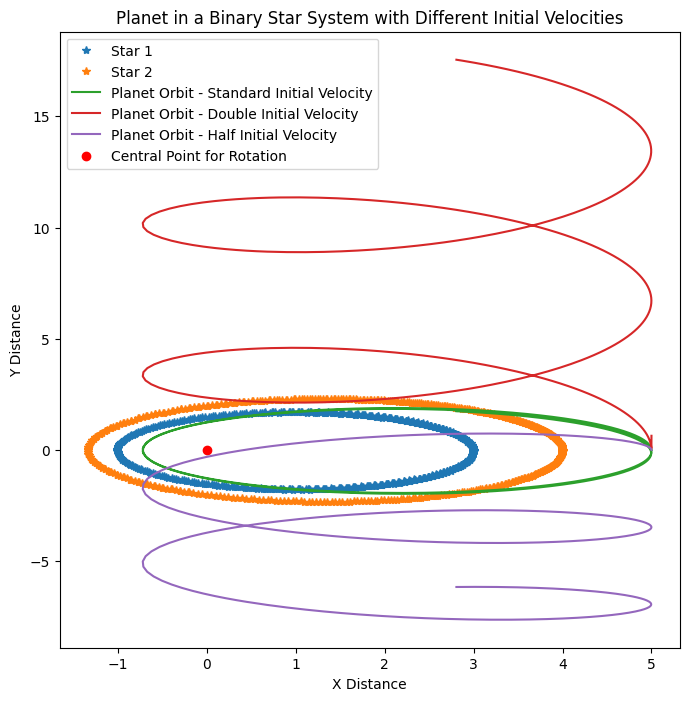

In [40]:
import matplotlib.pyplot as plt
import numpy as np

#initial conditions

#constants
G= 1

#timing
n=500
dt=0.1

#star 1
m_star1 = 1
star1_x, star1_y = 3, 0
star1_velocity = np.sqrt(G*m_star1/np.sqrt(star1_x**2 + star1_y**2))
star1_vx, star1_vy = 0, star1_velocity #initial velocities
positions_star1 = [(star1_x,star1_y)]

#star 2
m_star2 = 1
star2_x, star2_y = 4, 0
star2_velocity = np.sqrt(G*m_star2/np.sqrt(star2_x**2 + star2_y**2))
star2_vx, star2_vy = 0, star2_velocity
positions_star2 = [(star2_x,star2_y)]

#planet
m_planet = 0.5
planet_x, planet_y = 5, 0
planet_velocity = np.sqrt(G*m_planet/np.sqrt(planet_x**2 + planet_y**2))
planet_vx, planet_vy = 0, planet_velocity
positions_planet = [(planet_x,planet_y)]

#planet different initial velocities
#double the initial velocity
planet_x1, planet_y1 = 5, 0
planet_vx1, planet_vy1 = 0, 2*planet_velocity
positions_planet1 = [(planet_x1,planet_vy1)]
#half the initial velocity
planet_x2, planet_y2 = 5, 0
planet_vx2, planet_vy2 = 0, 0.5*planet_velocity
positions_planet2 = [(planet_x2,planet_y2)]


#center point that stars rotate around
center_x, center_y = 0, 0
m_center = 2


def force_gravity(obj_x,obj_y,m_obj,m_rotation_point): #gravity formula is -Gmm/r^2
  radius = np.sqrt(obj_x**2 + obj_y**2)
  angle = np.arctan2(obj_y, obj_x)
  force = -G * (m_obj * m_rotation_point) / radius**2
  fx = force * np.cos(angle)
  fy = force * np.sin(angle)
  return fx, fy


#simulate star1 orbits
for i in range(n):
  #star1
  fx_1, fy_1 = force_gravity(star1_x,star1_y,m_star1, m_center)
  #update velocities
  star1_vx += fx_1 / m_star1 * dt
  star1_vy += fy_1 / m_star1 * dt
  # Update positions
  star1_x += star1_vx * dt
  star1_y += star1_vy * dt
  positions_star1.append((star1_x,star1_y))

  #star2
  fx_2, fy_2 = force_gravity(star2_x,star2_y,m_star2, m_center)
  #update velocities
  star2_vx += fx_2 / m_star2 * dt
  star2_vy += fy_2 / m_star2 * dt
  # Update positions
  star2_x += star2_vx * dt
  star2_y += star2_vy * dt
  positions_star2.append((star2_x,star2_y))


  #planet
  fx_p1, fy_p1 = force_gravity(planet_x,planet_y,m_planet, m_star1)
  fx_p2, fy_p2 = force_gravity(planet_x,planet_y,m_planet,m_star2)
  fx_p = fx_p1+fx_p2
  fy_p = fy_p1+fy_p2
  #update velocities
  planet_vx += fx_p / m_planet * dt
  planet_vy += fy_p / m_planet * dt
  planet_vx1 += fx_p / m_planet * dt
  planet_vy1 += fy_p / m_planet * dt
  planet_vx2 += fx_p / m_planet * dt
  planet_vy2 += fy_p / m_planet * dt
  # Update positions
  planet_x += planet_vx * dt
  planet_y += planet_vy * dt
  planet_x1 += planet_vx1 * dt
  planet_y1 += planet_vy1 * dt
  planet_x2 += planet_vx2 * dt
  planet_y2 += planet_vy2 * dt
  positions_planet.append((planet_x,planet_y))
  positions_planet1.append((planet_x1,planet_y1))
  positions_planet2.append((planet_x2,planet_y2))

#plotting
plt.figure(figsize=(8, 8))
plt.plot(*zip(*positions_star1),'*' ,label="Star 1")
plt.plot(*zip(*positions_star2), '*', label="Star 2")
plt.plot(*zip(*positions_planet), label="Planet Orbit - Standard Initial Velocity")
plt.plot(*zip(*positions_planet1), label="Planet Orbit - Double Initial Velocity")
plt.plot(*zip(*positions_planet2), label="Planet Orbit - Half Initial Velocity")
plt.scatter([center_x], [center_y], color='red', label="Central Point for Rotation")
plt.title("Planet in a Binary Star System with Different Initial Velocities")
plt.xlabel("X Distance")
plt.ylabel("Y Distance")
plt.legend()
plt.show()